# SPRINT 2 - TEAM ID : PNT2022TMID19575

TEAM MEMBERS : VAISHNAVI K[Team Leader]  
GNANAPRAVEENA R  
PAVITHRA M  
SNEKA K  

# MODEL BUILDING FOR VEGETABLE DISEASE PREDICTION

# Image Augumentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"C:\\Users\\vaishu\\Downloads\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r'C:\\Users\\vaishu\Downloads\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


# ADDING CNN

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# HIDDEN LAYERS

In [13]:
model.add(Dense(300,activation='relu'))

In [14]:
model.add(Dense(150,activation='relu'))

# OUTPUT LAYER

In [15]:
model.add(Dense(9,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

475

In [18]:
1238/24

51.583333333333336

# Fitting the Model

In [19]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 740s 2s/step - loss: 1.5010 - accuracy: 0.5813 - val_loss: 0.8844 - val_accuracy: 0.6862
Epoch 2/10
475/475 [==============================] - 315s 663ms/step - loss: 0.6196 - accuracy: 0.7845 - val_loss: 0.5236 - val_accuracy: 0.8156
Epoch 3/10
475/475 [==============================] - 292s 614ms/step - loss: 0.4700 - accuracy: 0.8343 - val_loss: 0.3397 - val_accuracy: 0.8838
Epoch 4/10
475/475 [==============================] - 287s 603ms/step - loss: 0.4111 - accuracy: 0.8531 - val_loss: 0.3925 - val_accuracy: 0.8522
Epoch 5/10
475/475 [==============================] - 289s 608ms/step - loss: 0.3539 - accuracy: 0.8766 - val_loss: 0.2728 - val_accuracy: 0.9025
Epoch 6/10
475/475 [==============================] - 281s 591ms/step - loss: 0.3033 - accuracy: 0.8955 - val_loss: 0.3506 - val_accuracy: 0.8841
Epoch 7/10
475/475 [==============================] - 310s 653ms/step - loss: 0.2959 - accuracy: 0.8959 - val_loss: 0.2155 - va

In [20]:
model.save('vegetables.h5')

In [77]:
import numpy as np

In [78]:
from tensorflow.keras.models import load_model

In [79]:
from tensorflow.keras.preprocessing import image

In [80]:
model=load_model('vegetables.h5')

In [163]:
img=image.load_img(r"C:\Users\vaishu\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Septoria_leaf_spot\c280146e-f898-446c-a1e2-af20cc2b0251___Keller.St_CG 1884.jpg",target_size=(128,128))

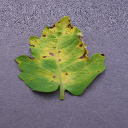

In [164]:
img

In [165]:
x = image.img_to_array(img)

In [166]:
x

array([[[135., 127., 150.],
        [160., 152., 175.],
        [144., 136., 159.],
        ...,
        [136., 130., 156.],
        [117., 111., 137.],
        [130., 124., 150.]],

       [[136., 128., 151.],
        [123., 115., 138.],
        [127., 119., 142.],
        ...,
        [116., 110., 136.],
        [124., 118., 144.],
        [114., 108., 134.]],

       [[151., 143., 166.],
        [121., 113., 136.],
        [139., 131., 154.],
        ...,
        [118., 112., 138.],
        [ 97.,  91., 117.],
        [122., 116., 142.]],

       ...,

       [[106.,  98., 119.],
        [105.,  97., 118.],
        [104.,  96., 117.],
        ...,
        [102.,  94., 117.],
        [103.,  95., 118.],
        [104.,  96., 119.]],

       [[105.,  97., 118.],
        [105.,  97., 118.],
        [104.,  96., 117.],
        ...,
        [109., 101., 124.],
        [109., 101., 124.],
        [105.,  97., 120.]],

       [[102.,  94., 115.],
        [100.,  92., 113.],
        [ 98.,  

In [167]:
x = np.expand_dims(x,axis=0)

In [168]:
x

array([[[[135., 127., 150.],
         [160., 152., 175.],
         [144., 136., 159.],
         ...,
         [136., 130., 156.],
         [117., 111., 137.],
         [130., 124., 150.]],

        [[136., 128., 151.],
         [123., 115., 138.],
         [127., 119., 142.],
         ...,
         [116., 110., 136.],
         [124., 118., 144.],
         [114., 108., 134.]],

        [[151., 143., 166.],
         [121., 113., 136.],
         [139., 131., 154.],
         ...,
         [118., 112., 138.],
         [ 97.,  91., 117.],
         [122., 116., 142.]],

        ...,

        [[106.,  98., 119.],
         [105.,  97., 118.],
         [104.,  96., 117.],
         ...,
         [102.,  94., 117.],
         [103.,  95., 118.],
         [104.,  96., 119.]],

        [[105.,  97., 118.],
         [105.,  97., 118.],
         [104.,  96., 117.],
         ...,
         [109., 101., 124.],
         [109., 101., 124.],
         [105.,  97., 120.]],

        [[102.,  94., 115.],
       

In [169]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 99ms/step


In [170]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [171]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [175]:
img=image.load_img(r"C:\Users\vaishu\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___Bacterial_spot\afd0c913-1e90-4ff9-9a61-bd0a5297c012___JR_B.Spot 3221.jpg",target_size=(128,128))

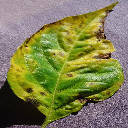

In [176]:
img

In [177]:
x = image.img_to_array(img)

In [178]:
x

array([[[177., 161., 171.],
        [170., 154., 164.],
        [166., 150., 160.],
        ...,
        [142., 137., 157.],
        [125., 120., 140.],
        [142., 137., 157.]],

       [[167., 151., 161.],
        [168., 152., 162.],
        [176., 160., 170.],
        ...,
        [148., 143., 163.],
        [142., 137., 157.],
        [148., 143., 163.]],

       [[158., 142., 152.],
        [163., 147., 157.],
        [164., 148., 158.],
        ...,
        [147., 139., 160.],
        [157., 149., 170.],
        [158., 150., 171.]],

       ...,

       [[ 12.,  10.,  13.],
        [ 12.,  10.,  13.],
        [ 12.,  10.,  13.],
        ...,
        [100.,  85., 106.],
        [126., 111., 132.],
        [132., 117., 138.]],

       [[ 11.,   9.,  12.],
        [ 11.,   9.,  12.],
        [ 11.,   9.,  12.],
        ...,
        [119., 104., 125.],
        [131., 116., 137.],
        [109.,  94., 115.]],

       [[ 14.,  12.,  15.],
        [ 14.,  12.,  15.],
        [ 14.,  

In [179]:
x = np.expand_dims(x,axis=0)


In [180]:
x

array([[[[177., 161., 171.],
         [170., 154., 164.],
         [166., 150., 160.],
         ...,
         [142., 137., 157.],
         [125., 120., 140.],
         [142., 137., 157.]],

        [[167., 151., 161.],
         [168., 152., 162.],
         [176., 160., 170.],
         ...,
         [148., 143., 163.],
         [142., 137., 157.],
         [148., 143., 163.]],

        [[158., 142., 152.],
         [163., 147., 157.],
         [164., 148., 158.],
         ...,
         [147., 139., 160.],
         [157., 149., 170.],
         [158., 150., 171.]],

        ...,

        [[ 12.,  10.,  13.],
         [ 12.,  10.,  13.],
         [ 12.,  10.,  13.],
         ...,
         [100.,  85., 106.],
         [126., 111., 132.],
         [132., 117., 138.]],

        [[ 11.,   9.,  12.],
         [ 11.,   9.,  12.],
         [ 11.,   9.,  12.],
         ...,
         [119., 104., 125.],
         [131., 116., 137.],
         [109.,  94., 115.]],

        [[ 14.,  12.,  15.],
       

In [181]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 78ms/step


In [182]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [183]:
index[y[0]]

'Pepper,_bell___Bacterial_spot'